# Comment faire une représentation graphique des annotations d'une séquence

## Introduction

Dans plusieurs situations (publications ou pages web), on dispose d'une séquence d'ADN ou de protéines d'un côté et des éléments descriptifs ou fonctionnels (*features*) d'un autre côté et on veut fusionner les deux ensembles de données dans un graphique. Comment faire? En utilisant la librairie [`dna_features_viwer`](https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer) en association avec BioPython (documentation détaillée [ici](https://edinburgh-genome-foundry.github.io/DnaFeaturesViewer/#)).

Référence: [DNA Features Viewer: a sequence annotation formatting and plotting library for Python](https://academic.oup.com/bioinformatics/article/36/15/4350/5868559?login=false). Zulkover, V & Rosser, S. Bioinformatics, 36(15): 4350-4352 (2020)

#### Pré-requis nécessaires

Avant de commencer, assurons-nous uqe les modules nécessaires soient installés sur notre plateforme; si BioPython n'est pas déjà installé, il le sera avec DNA FeatureViewer :-)

In [2]:
!pip3 install dna_features_viewer

#### Code de démonstration

Voici notre exemple avec le plasmide pGEM-9Zf.

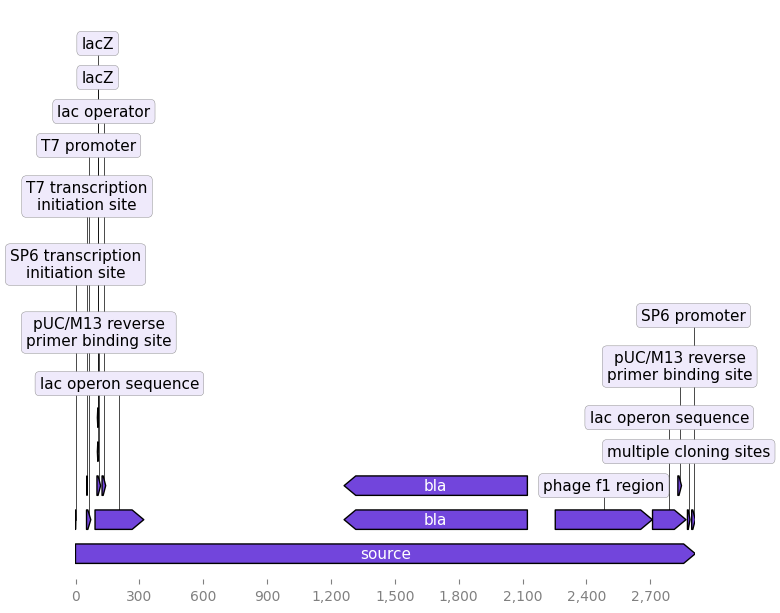

In [13]:
# Importons la librairie DNA Features Viewer, capable de 
# lire les fichiers via BioPython
#
from dna_features_viewer import BiopythonTranslator

# C'est un début...
dnaGraphics = BiopythonTranslator().translate_record("../z.misc_files/data_seq/vector.pGEM-9Zf-minus.gb")
ax, _ = dnaGraphics.plot()

On a un problème... Nous savons que notre séquence est circulaire car c'est un plasmide ;-) Comment faire pour circulariser?

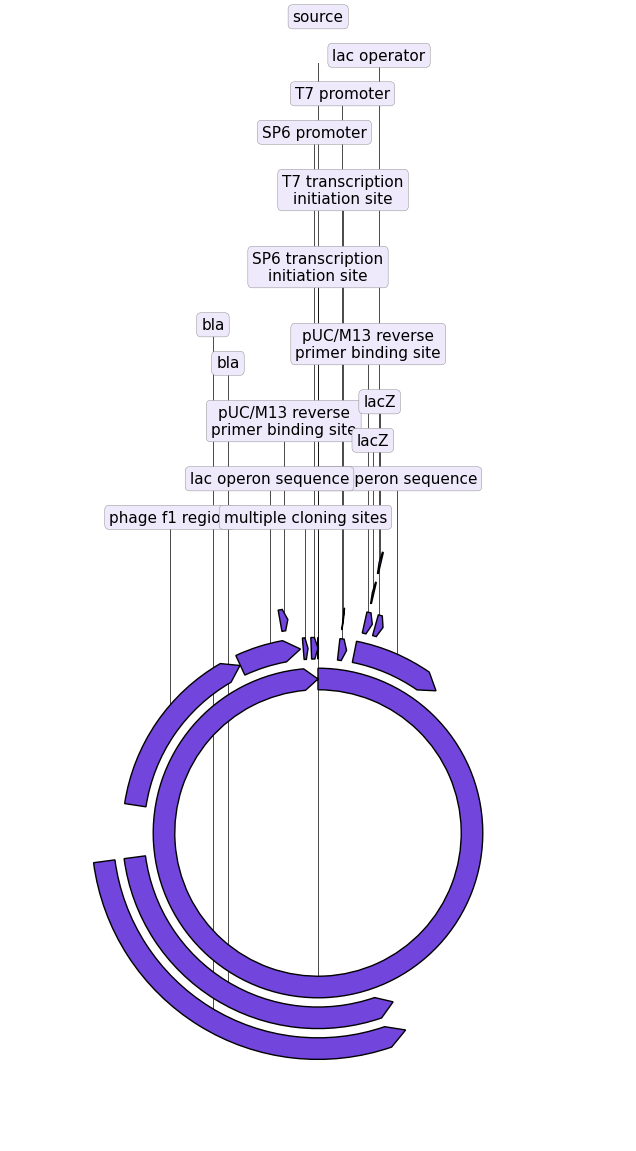

In [16]:
# Importons la librairie DNA Features Viewer, capable de 
# lire les fichiers via BioPython
#
# Importons en plus la classe CircularGraphicRecord
#
from dna_features_viewer import BiopythonTranslator, CircularGraphicRecord
#
# Specifions que notre graphique devra etre circulaire
# C'est mieux ;-)
#
dnaGraphics = BiopythonTranslator().translate_record("../z.misc_files/data_seq/vector.pGEM-9Zf-minus.gb", record_class=CircularGraphicRecord)
ax, _ = dnaGraphics.plot()

Il y a beaucoup de trucs dans ce dessin, pas nécessairement utiles; de plus, pourquoi ne pas mettre un peu de couleur pour distinguer les éléments d'information les uns des autres. Comment filtrer parmi toutes les annotations,cellles que nous voulons représenter dans le dessin? Primo, il faut connaitre les infos associés à nos annotations.

In [32]:
#
# Comment voir les annotations (features) de notre sequence?
#
from Bio import SeqIO

dnaSeq = SeqIO.read("../z.misc_files/data_seq/vector.pGEM-9Zf-minus.gb","genbank")

#
# Passons au travers de toutes les annotations contenues dans le fichier
#
for i in dnaSeq.features:
    print(i)

type: source
location: [0:2912](+)
qualifiers:
    Key: db_xref, Value: ['taxon:90118']
    Key: mol_type, Value: ['other DNA']
    Key: organism, Value: ['Cloning vector pGEM-9Zf(-)']

type: misc_feature
location: [0:1](+)
qualifiers:
    Key: note, Value: ['SP6 transcription initiation site']

type: regulatory
location: [52:72](+)
qualifiers:
    Key: note, Value: ['T7 promoter']
    Key: regulatory_class, Value: ['promoter']

type: misc_feature
location: [54:55](+)
qualifiers:
    Key: note, Value: ['T7 transcription initiation site']

type: misc_feature
location: [92:321](+)
qualifiers:
    Key: note, Value: ['lac operon sequence']

type: misc_feature
location: [101:118](+)
qualifiers:
    Key: note, Value: ['pUC/M13 reverse primer binding site']

type: gene
location: [103:106](-)
qualifiers:
    Key: gene, Value: ['lacZ']

type: misc_feature
location: [103:106](-)
qualifiers:
    Key: gene, Value: ['lacZ']
    Key: note, Value: ['lacZ start codon']

type: misc_feature
location: [1

On voit que chaque annotation possède:
  - Un type (selon le dictionnaire plus ou moins standard des annotations du NCBI);
  - Une position, incluant une orientation;
  - Des infos spécifiques dans la rubrique *qualifiers*, sous la forme d'un dictionnaire.

Ok. nous ne garderons que les éléments suivants:
  - La séquence codante de la béta-lactamase pour la résistance à l'ampicilline (en vert);
  - Le site de multi-clonage (en bleu);
  - Les deux séquences correspondantes des amorces pUC/M13 pour le séquençage (en rouge).

Comment faire maintenant? Lorsque on lit le fichier Genbank via la méthode *translate_records*, les annotations sont automatiquement lues dans un *SeqIO.features* que la méthode *plot* lira pour faire le dessin. Le truc est de redéfinir le contenu du *SeqIO.features* en redéfinissant l'objet *BiopythonTranslator*.

ValueError: Invalid RGBA argument: None

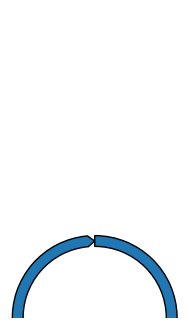

In [7]:
# Importons la librairie DNA Features Viewer, capable de 
# lire les fichiers via BioPython
#
# Importons en plus la classe CircularGraphicRecord
#
from dna_features_viewer import BiopythonTranslator, CircularGraphicRecord
#
# Redefinnisons comment BiopythonTranslator fonctionnera
# 
class TranslatorSurMesure(BiopythonTranslator):
    #
    # Re-specifions les couleurs recherches
    #
    # On peut utiliser des couleurs spécifiques 
    # (voir https://www.w3schools.com/TAGs/ref_colornames.asp)
    # ou bien des codes hexadécimaux HTML (voir https://htmlcolorcodes.com)
    #
    def compute_feature_color(self, feature):
      if feature.type == "CDS":
          return "red"
      elif feature.type == "regulatory":
          return "green"
      elif feature.type == "misc_feature":
          return "blue"
      elif feature.type == "backbone":
          return "black"       
      
#        color_map = { 
#           "CDS": "#55FF00", # vert 
#          "regulatory": "red", 
#          "misc_feature": "darkblue", # light blue 
#          "backbone": "black"}  
    
#      return color_map[feature.type]        
    #
    # Gardons les features que nous voulons
    #
    #def compute_feature_label(self, feature): 

        
#
# Specifions que notre graphique devra etre circulaire
# C'est mieux ;-)
#
myTranslator = TranslatorSurMesure()
dnaGraphics = myTranslator.translate_record("../z.misc_files/data_seq/vector.pGEM-9Zf-minus.gb", record_class=CircularGraphicRecord)
ax, _ = dnaGraphics.plot(figure_width=40)
